In [160]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('spotify_data.csv')
columns_to_drop = ['Unnamed: 0', 'track_id','mode','time_signature']
df.drop(columns=columns_to_drop, inplace=True)
df

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Jason Mraz,I Won't Give Up,68,2012,acoustic,0.483,0.303,4,-10.058,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,240166
1,Jason Mraz,93 Million Miles,50,2012,acoustic,0.572,0.454,3,-10.286,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,216387
2,Joshua Hyslop,Do Not Let Me Go,57,2012,acoustic,0.409,0.234,3,-13.711,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,158960
3,Boyce Avenue,Fast Car,58,2012,acoustic,0.392,0.251,10,-9.845,0.0363,0.8070,0.000000,0.0797,0.5080,204.961,304293
4,Andrew Belle,Sky's Still Blue,54,2012,acoustic,0.430,0.791,6,-5.419,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,244320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159759,Nicola Conte,Black Spirits,4,2011,trip-hop,0.373,0.742,10,-6.453,0.0736,0.3250,0.000141,0.1590,0.5220,107.951,344013
1159760,Nicola Conte,Quiet Dawn,3,2011,trip-hop,0.516,0.675,7,-7.588,0.0326,0.7880,0.000129,0.1300,0.2640,119.897,285067
1159761,Amon Tobin,Morning Ms Candis,2,2011,trip-hop,0.491,0.440,5,-8.512,0.0274,0.4770,0.003130,0.0936,0.0351,100.076,214253
1159762,Peace Orchestra,Happy Christmas (War Is Over),0,2011,trip-hop,0.480,0.405,0,-13.343,0.0276,0.4310,0.000063,0.1250,0.2020,133.885,239133


In [161]:
genre_year_avg_popularity = df.groupby(['year', 'genre'])['popularity'].mean().reset_index()

# Rank the genres within each year based on their average popularity
genre_year_avg_popularity['rank'] = genre_year_avg_popularity.groupby('year')['popularity'].rank(ascending=False)

# Filter the top 20 genres for each year
top_20_genres_by_year = genre_year_avg_popularity[genre_year_avg_popularity['rank'] <= 20]

# Sort the DataFrame by 'year' and then 'rank'
top_20_genres_by_year.sort_values(by=['year', 'rank'], ascending=[True, True], inplace=True)

# The 'top_20_genres_by_year' DataFrame contains the top 20 popular genres for each year, sorted by year and rank
print(top_20_genres_by_year)

      year     genre  popularity  rank
66    2000       sad   61.000000   1.0
56    2000       pop   44.899054   2.0
63    2000      rock   40.954023   3.0
2     2000  alt-rock   33.763393   4.0
49    2000     metal   33.328000   5.0
...    ...       ...         ...   ...
1838  2023  alt-rock   30.723705  16.0
1897  2023      punk   30.467033  17.0
1883  2023      jazz   29.201983  18.0
1910  2023      soul   28.746835  19.0
1862  2023       emo   28.540049  20.0

[480 rows x 4 columns]


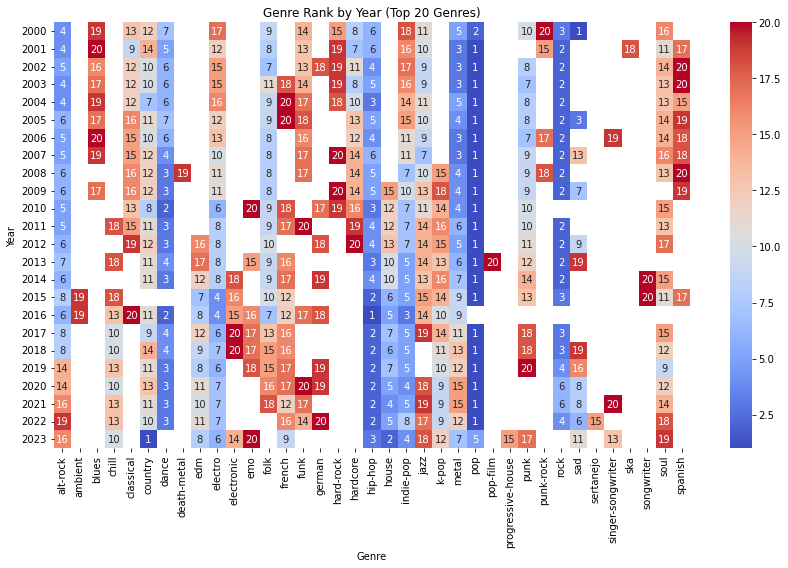

In [162]:
# Pivot the filtered DataFrame to create a genre-year matrix with rank as values
genre_rank_matrix = top_20_genres_by_year.pivot(index='year', columns='genre', values='rank')

# Create a heatmap to visualize the rank of genres by year
plt.figure(figsize=(12, 8))
sns.heatmap(genre_rank_matrix, cmap='coolwarm', annot=True, fmt='g', cbar=True)
plt.title('Genre Rank by Year (Top 20 Genres)')
plt.xlabel('Genre')
plt.ylabel('Year')

# Show the plot
plt.tight_layout()
plt.show()

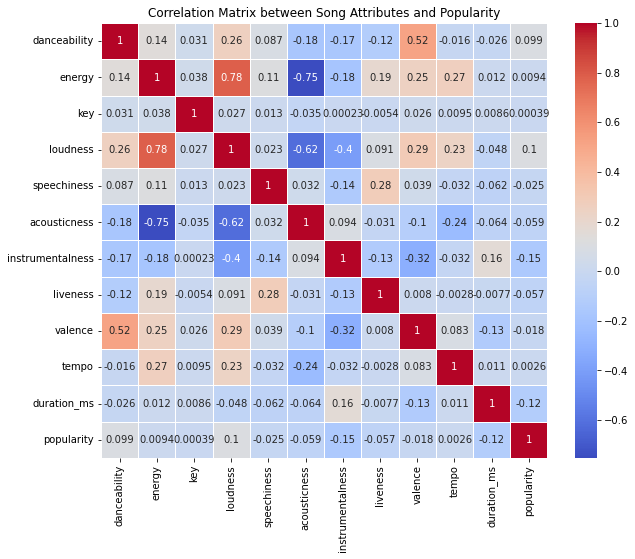

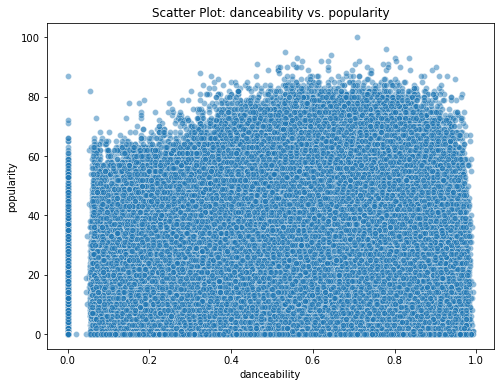

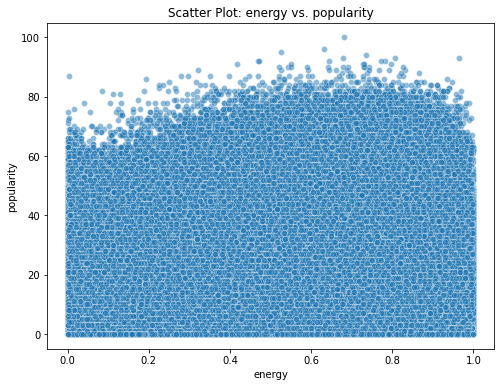

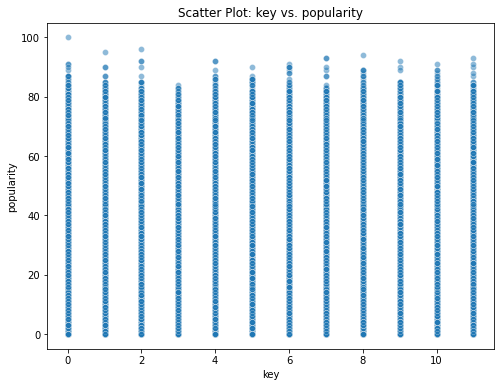

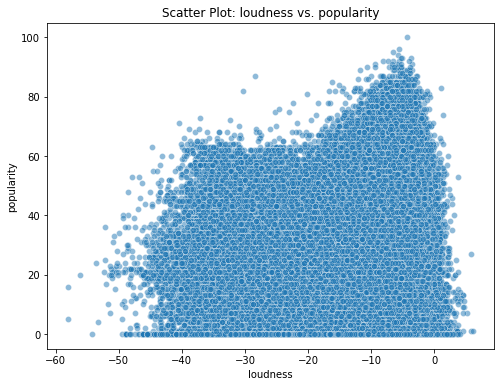

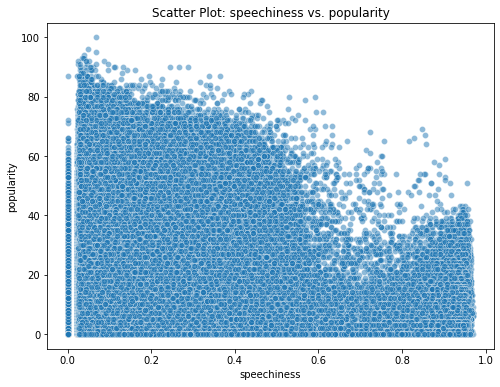

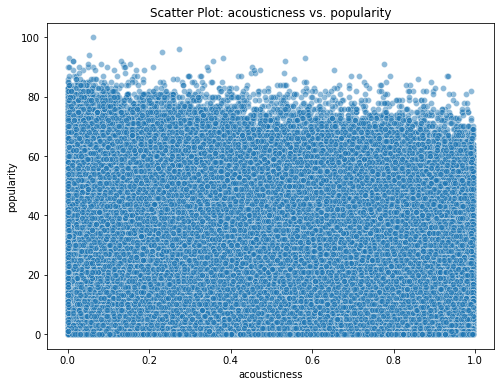

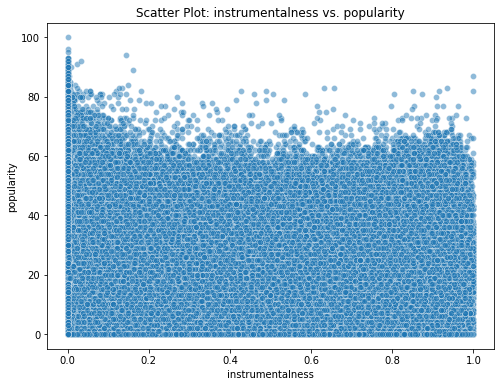

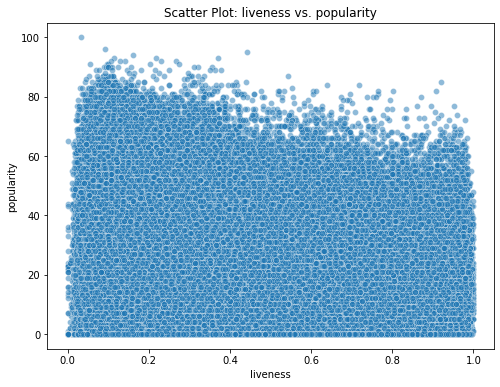

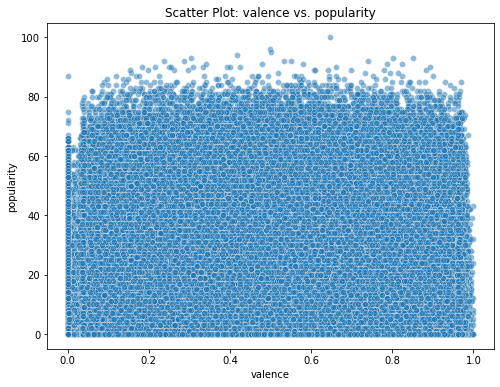

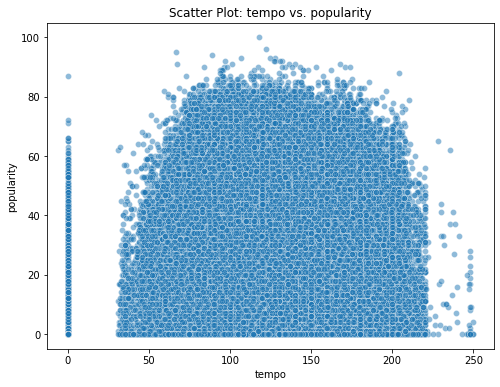

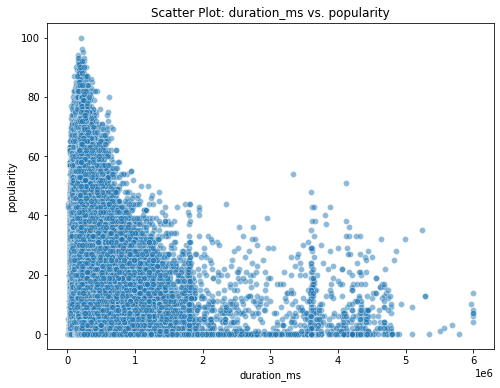

In [163]:
# Select the relevant attributes and 'Popularity'
selected_attributes = ['danceability', 'energy', 'key', 'loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms']
data = df[selected_attributes + ['popularity']]

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix between Song Attributes and Popularity')
plt.show()

# Scatter plots to visualize each attribute vs. Popularity
for attribute in selected_attributes:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=attribute, y='popularity', alpha=0.5)
    plt.title(f'Scatter Plot: {attribute} vs. popularity')
    plt.xlabel(attribute)
    plt.ylabel('popularity')
    plt.show()